In [1]:
!pip install -U git+https://github.com/qubvel/efficientnet
!pip install git+https://github.com/qubvel/classification_models.git of the current session

  Cloning https://github.com/qubvel/efficientnet to /tmp/pip-req-build-bsk1jp4z
  Running command git clone -q https://github.com/qubvel/efficientnet /tmp/pip-req-build-bsk1jp4z
  Resolved https://github.com/qubvel/efficientnet to commit f7f3e736c113b872caf53dae9fbbda996a8eb87d
     |████████████████████████████████| 50 kB 694 kB/s 
  Created wheel for efficientnet: filename=efficientnet-1.1.1-py3-none-any.whl size=18447 sha256=39a36dd1bb26e7e962a6beeb7718457104a43141ae52fdbe3faae5224d2f6549
  Stored in directory: /tmp/pip-ephem-wheel-cache-0s6vfl01/wheels/11/69/85/814d64d694c96db0eef17b718042d644a1e54f113920481920
Successfully built efficientnet
  Cloning https://github.com/qubvel/classification_models.git to /tmp/pip-req-build-e2eh1r8u
  Running command git clone -q https://github.com/qubvel/classification_models.git /tmp/pip-req-build-e2eh1r8u
  Resolved https://github.com/qubvel/classification_models.git to commit a0f006e05485a34ccf871c421279864b0ccd220b
  Running command git submo

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import model_from_json
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import efficientnet.tfkeras as efn 
import tensorflow.keras.layers as L
from tensorflow.keras.models import Model

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adadelta
from sklearn.datasets import load_files
from skmultilearn.model_selection import iterative_train_test_split

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

2021-09-18 14:55:17.665513: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-09-18 14:55:17.665626: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


/kaggle/input/teeth-dataset/teeth_dataset/teeth_dataset/test/no-caries/nc9.jpg
/kaggle/input/teeth-dataset/teeth_dataset/teeth_dataset/test/no-caries/nc10.jpg
/kaggle/input/teeth-dataset/teeth_dataset/teeth_dataset/test/no-caries/nc1.jpg
/kaggle/input/teeth-dataset/teeth_dataset/teeth_dataset/test/no-caries/nc2.jpg
/kaggle/input/teeth-dataset/teeth_dataset/teeth_dataset/test/caries/wc2.jpg
/kaggle/input/teeth-dataset/teeth_dataset/teeth_dataset/test/caries/wc45.jpg
/kaggle/input/teeth-dataset/teeth_dataset/teeth_dataset/test/caries/wc50.jpg
/kaggle/input/teeth-dataset/teeth_dataset/teeth_dataset/test/caries/wc44.jpg
/kaggle/input/teeth-dataset/teeth_dataset/teeth_dataset/test/caries/wc49.jpg
/kaggle/input/teeth-dataset/teeth_dataset/teeth_dataset/test/caries/wc1.jpg
/kaggle/input/teeth-dataset/teeth_dataset/teeth_dataset/test/caries/wc8.jpg
/kaggle/input/teeth-dataset/teeth_dataset/teeth_dataset/test/caries/wc55.jpg
/kaggle/input/teeth-dataset/teeth_dataset/teeth_dataset/test/caries/wc

In [3]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )


test_datagen = ImageDataGenerator(rescale = 1./255)

In [4]:
X_train = train_datagen.flow_from_directory('../input/teeth-dataset/teeth_dataset/teeth_dataset/Trianing',
                                    target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

X_test = test_datagen.flow_from_directory('../input/teeth-dataset/teeth_dataset/teeth_dataset/Trianing',
                          target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')


Found 60 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [5]:
dim = 64, 64

def teethModel(input_dim, base_model):
    
    input_tensor = L.Input(input_dim)
    curr_output  = base_model(input_tensor)
    curr_output  = L.GlobalAveragePooling2D()(curr_output)
    oputput      = L.Dense(1,activation='sigmoid')(curr_output)
    model = Model(input_tensor, oputput)
    return model

# base model
efnet = efn.EfficientNetB1(weights='imagenet', include_top = False, 
                           input_shape=(*dim, 3))

efnet.trainable = False


# building the complete model
model = teethModel(input_dim=(*dim,3), base_model = efnet)

2021-09-18 14:55:24.691387: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-18 14:55:24.694749: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-09-18 14:55:24.694795: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-09-18 14:55:24.694826: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (5bbe3e10ba83): /proc/driver/nvidia/version does not exist
2021-09-18 14:55:24.695279: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operation

27164672/27164032 [==============================] - 0s 0us/step


In [6]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)

cd = [es, mc]

In [7]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [8]:
model.fit_generator(
    X_train,
    steps_per_epoch=X_train.samples//X_train.batch_size,
    epochs=1000,
    callbacks=cd,
    validation_data=X_test,
    validation_steps=X_test.samples//X_test.batch_size)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2021-09-18 14:55:29.845016: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-18 14:55:29.850729: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2199995000 Hz


Epoch 1/1000
1/1 [==============================] - 12s 12s/step - loss: 0.7559 - accuracy: 0.3571 - val_loss: 0.5991 - val_accuracy: 0.7188
Epoch 2/1000
1/1 [==============================] - 1s 628ms/step - loss: 0.6643 - accuracy: 0.6562 - val_loss: 0.5907 - val_accuracy: 0.7188
Epoch 3/1000
1/1 [==============================] - 1s 612ms/step - loss: 0.6158 - accuracy: 0.7188 - val_loss: 0.5578 - val_accuracy: 0.7500
Epoch 4/1000
1/1 [==============================] - 1s 612ms/step - loss: 0.6574 - accuracy: 0.6250 - val_loss: 0.5175 - val_accuracy: 0.7812
Epoch 5/1000
1/1 [==============================] - 1s 594ms/step - loss: 0.5813 - accuracy: 0.7812 - val_loss: 0.5676 - val_accuracy: 0.6875
Epoch 6/1000
1/1 [==============================] - 1s 606ms/step - loss: 0.5458 - accuracy: 0.7812 - val_loss: 0.5429 - val_accuracy: 0.7188
Epoch 7/1000
1/1 [==============================] - 1s 625ms/step - loss: 0.4507 - accuracy: 0.8438 - val_loss: 0.4782 - val_accuracy: 0.7500
Epoch 8

In [9]:
model.save("teeth_model.h5")

In [10]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [11]:
from PIL import Image
import numpy as np
from skimage import transform
import matplotlib.pyplot as plt

def load(filename):
   np_image = Image.open(filename)
   np_image = np.array(np_image).astype('float32')/255
   np_image = transform.resize(np_image, (64, 64, 3))
   np_image = np.expand_dims(np_image, axis=0)
   return np_image

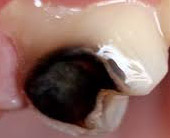

In [12]:
Image.open('../input/teeth-dataset/teeth_dataset/teeth_dataset/test/caries/wc1.jpg')

In [13]:
def prediction(result):
    if result == 0:
        prediction = "Bad"
    elif result == 1:
        prediction = "Good"
    else:
        prediction = result
    return prediction

def total(filename):
  image = load(filename)
  pred = model.predict(image)
  result = np.argmax(pred, axis=1)
  return prediction(result)

In [14]:
print(total('../input/teeth-dataset/teeth_dataset/teeth_dataset/test/caries/wc1.jpg'))

Bad
